In [1]:
import pandas as pd

In [2]:
airlines=pd.read_csv('c:/tmp/airelines.txt')

In [3]:
flights=pd.read_csv('c:/tmp/flights.txt')

In [4]:
airports=pd.read_csv('c:/tmp/airports.txt')

In [7]:
airlines.head()

,iata_code,airline
0,AA,American Airlines Inc.
1,AS,Alaska Airlines Inc.
2,B6,JetBlue Airways
3,DL,Delta Air Lines Inc.
4,EV,Atlantic Southeast Airlines


In [8]:
flights.head()

,flight_id,flight_date,airline,flight_number,origin_airport,destination_airport,delay_in_minutes,cancelled,cancel_reason
0,1,2015-04-04,AS,98,ANC,SEA,976,0,NaN
1,2,2015-03-11,AA,2336,LAX,PBI,711,0,NaN
2,3,2015-07-14,US,840,SFO,CLT,937,0,NaN
3,4,2015-08-05,AA,258,LAX,MIA,609,0,NaN
4,5,2015-11-29,AS,135,SEA,ANC,119,0,NaN


In [9]:
airports.head()

,iata_code,airport,city,state,country,latitude,longituge
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40,-75
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32,-99
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35,-106
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45,-98
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31,-84


In [10]:
len(airlines)

14

In [15]:
airports.groupby('state')['airport'].count().to_frame().sort_values('airport',ascending=False).head(1)

,airport
state,
TX,24


In [5]:
import matplotlib.pyplot as plt

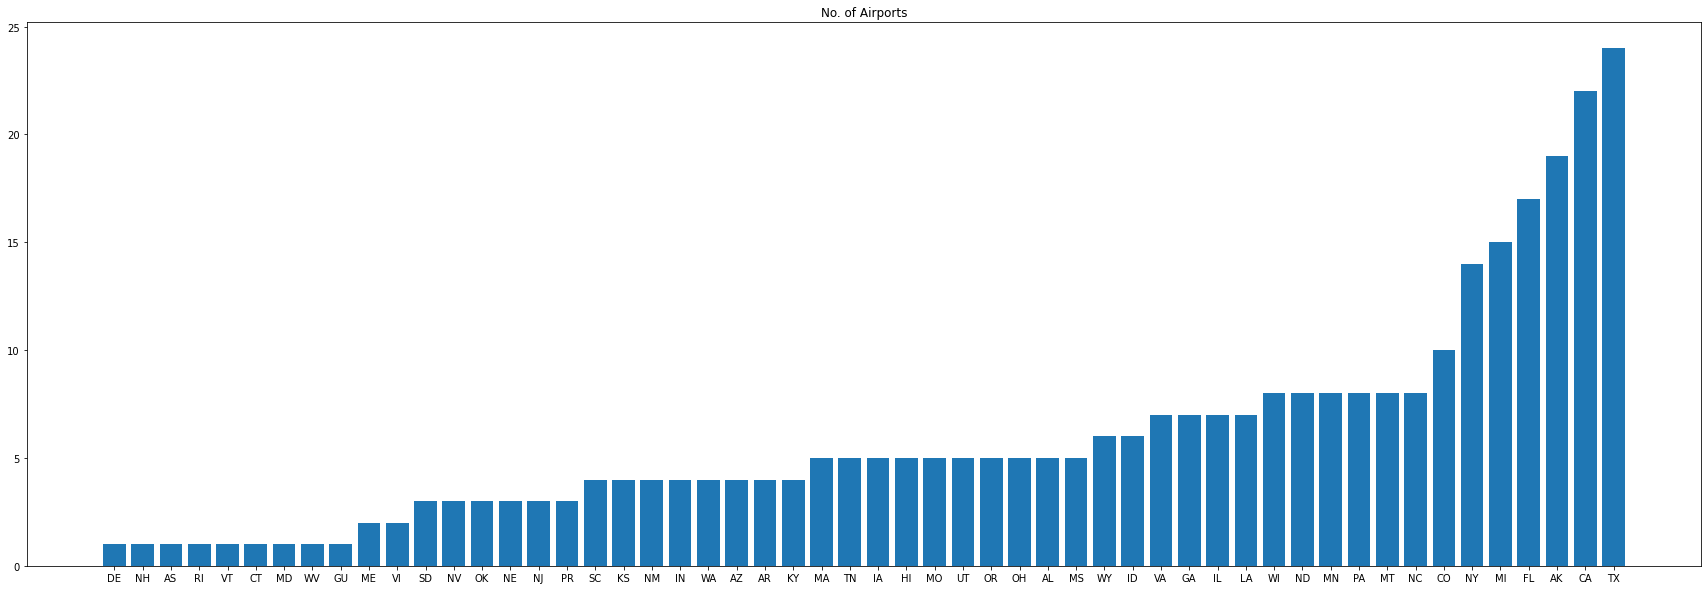

In [47]:
df=airports.groupby('state')['airport'].count().to_frame().sort_values('airport',ascending=True).rename(columns={'airport':'no.of.airports'})
x=df.index
y=df['no.of.airports']
plt.figure(figsize=(30,10))
plt.bar(x,y)
plt.title('No. of Airports')
plt.show()

In [51]:
flights.groupby('cancel_reason')['flight_id'].count().to_frame().sort_values('flight_id',ascending=False).head(1)

,flight_id
cancel_reason,
Security,456


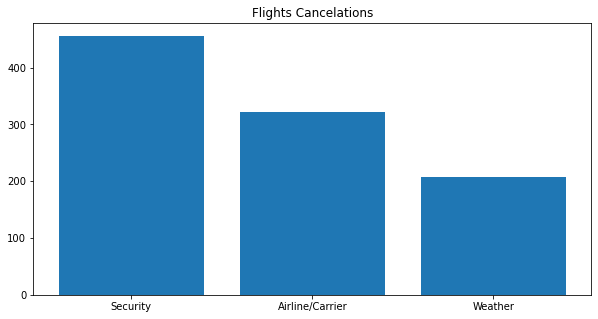

In [61]:
df=flights.groupby('cancel_reason')['flight_id'].count().to_frame().sort_values('flight_id',ascending=False)\
.rename(columns={'flight_id':'No.of_cancelations'})
x=df.index
y=df['No.of_cancelations']
plt.figure(figsize=(10,5))
plt.bar(x,y)

plt.title('Flights Cancelations')

plt.show()

In [63]:
flights.groupby('airline')['flight_id'].count().to_frame().rename(columns={'flight_id':'no.of.flights'})

,no.of.flights
airline,
AA,549
AS,190
B6,301
DL,633
EV,427
F9,93
HA,83
MQ,324
NK,116


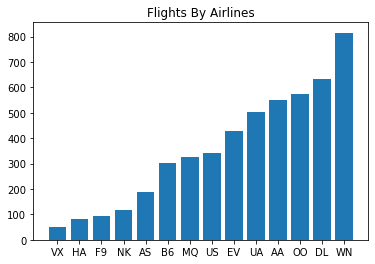

In [66]:
df=flights.groupby('airline')['flight_id'].count().to_frame().rename(columns={'flight_id':'no.of.flights'})\
.sort_values('no.of.flights')
x=df.index
y=df['no.of.flights']
plt.bar(x,y)

plt.title('Flights By Airlines')
plt.show()

In [69]:
df=flights.merge(airlines,how = 'inner',left_on='airline',right_on='iata_code')
df.groupby('airline_y')['delay_in_minutes'].sum().to_frame().sort_values('delay_in_minutes',ascending=False).head(1)


,delay_in_minutes
airline_y,
Southwest Airlines Co.,407462


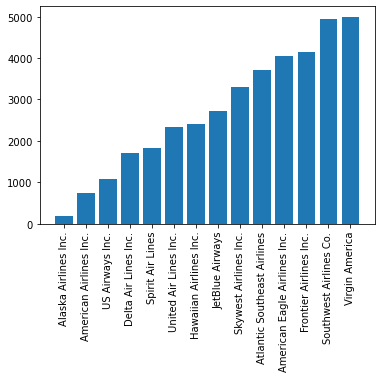

<Figure size 1440x360 with 0 Axes>

In [7]:
df=flights.merge(airlines,how = 'inner',left_on='airline',right_on='iata_code')
df.groupby('airline_y')['delay_in_minutes'].sum().to_frame().sort_values('delay_in_minutes',ascending=False)
x=df['airline_y']
y=df.index
plt.bar(x,y)
plt.xticks(rotation=90)
plt.figure(figsize=(20,5))
plt.show()

In [82]:
df.head()

,flight_id,flight_date,airline_x,flight_number,origin_airport,destination_airport,delay_in_minutes,cancelled,cancel_reason,iata_code,airline_y
0,1,2015-04-04,AS,98,ANC,SEA,976,0,NaN,AS,Alaska Airlines Inc.
1,5,2015-11-29,AS,135,SEA,ANC,119,0,NaN,AS,Alaska Airlines Inc.
2,16,2015-04-01,AS,108,ANC,SEA,458,0,NaN,AS,Alaska Airlines Inc.
3,19,2015-12-18,AS,122,ANC,PDX,211,1,Security,AS,Alaska Airlines Inc.
4,27,2015-12-21,AS,130,FAI,SEA,696,1,Security,AS,Alaska Airlines Inc.


In [101]:
mask1=df['origin_airport']=='LAX'
mask2=df['destination_airport']=='SFO'
dff=df[mask1&mask2].groupby('airline_y')['delay_in_minutes'].sum().to_frame().sort_values('delay_in_minutes',ascending=True)
dff.head(1)

,delay_in_minutes
airline_y,
Southwest Airlines Co.,511


TypeError: 'str' object is not callable

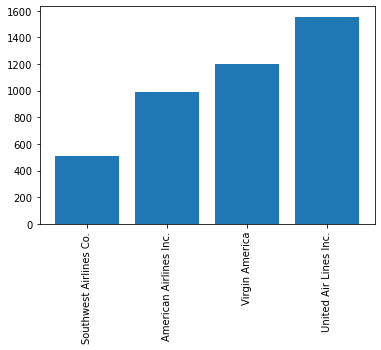

In [107]:

mask1=df['origin_airport']=='LAX'
mask2=df['destination_airport']=='SFO'
dff=df[mask1&mask2].groupby('airline_y')['delay_in_minutes'].sum().to_frame().sort_values('delay_in_minutes',ascending=True)
xa=dff.index
ya=dff['delay_in_minutes']
plt.bar(xa,ya)
plt.xticks(rotation=90)
plt.xlabel("airline")
plt.ylabel("delay in minutes")
plt.title("Delays by airline")
plt.show()

In [108]:
#8
flights.head()

,flight_id,flight_date,airline,flight_number,origin_airport,destination_airport,delay_in_minutes,cancelled,cancel_reason
0,1,2015-04-04,AS,98,ANC,SEA,976,0,NaN
1,2,2015-03-11,AA,2336,LAX,PBI,711,0,NaN
2,3,2015-07-14,US,840,SFO,CLT,937,0,NaN
3,4,2015-08-05,AA,258,LAX,MIA,609,0,NaN
4,5,2015-11-29,AS,135,SEA,ANC,119,0,NaN


In [112]:
mask=flights['cancelled']==1
can=flights[mask]
len(can)/len(flights)*100


19.7

In [12]:
mask=df['cancelled']==1
cancelled=df[mask].groupby('airline_y')['flight_id'].count().to_frame().rename(columns={'flight_id':'num_of_cancelled'})
alll=df.groupby('airline_y')['flight_id'].count().to_frame().rename(columns={'flight_id':'num_of_flights'})

In [18]:
data=cancelled.merge(alll,how='inner',left_on='airline_y',right_on='airline_y')
data['rate']=data['num_of_cancelled']/data['num_of_flights']*100
data.sort_values('rate',ascending=False).head(1)

,num_of_cancelled,num_of_flights,rate
airline_y,,,
Hawaiian Airlines Inc.,23,83,27.710843


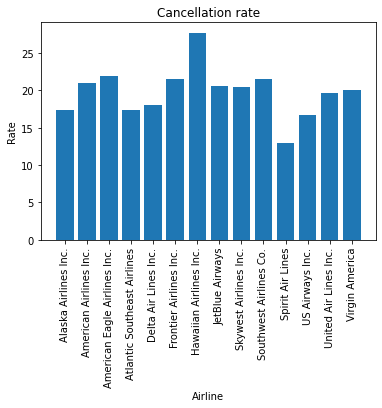

In [23]:
x=data.index
y=data['rate']
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Rate')
plt.title('Cancellation rate')
plt.show()